# Hurricane Prediction

## Intro

The idea is to predict hurricane entry based on a set of weather conditions that are measured in the USA.

In [1]:
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import time
from IPython.display import clear_output

Using TensorFlow backend.


In [2]:
def render_plots_numbers(data):
    values = data.values
    cols_to_plot = [col for col in range(1, len(data.columns)) if type(values[0, col]) != str]
    pyplot.figure(figsize=(10, len(cols_to_plot) * 1.2))
    i = 1
    for group in cols_to_plot:
        pyplot.subplot(len(cols_to_plot), 1, i)
        pyplot.plot(values[:, group])
        pyplot.title(data.columns[group], y=1, loc='right')
        i += 1
    pyplot.tight_layout(h_pad=1)
    pyplot.show()

In [3]:
houston_weather = read_csv('HurricaneData/Preprocessed/houston.csv', index_col=0)
hurdat_houston = read_csv('HurricaneData/Preprocessed/hurdat_houston.csv', index_col=0)

In [4]:
hurdat_houston

,Name,Event,Status,Latitude,Longitude,Maximum Wind,Minimum Pressure,Low Wind NE,Low Wind SE,Low Wind SW,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW
Date_Time,,,,,,,,,,,,,,,,,,,
1853-09-09 00:00:00,UNNAMED,,HU,390.0,623.0,100,0,0,0,0,0,0,0,0,0,0,0,0,0
1854-09-11 18:00:00,UNNAMED,,HU,395.0,618.0,90,0,0,0,0,0,0,0,0,0,0,0,0,0
1856-09-03 00:00:00,UNNAMED,,TS,382.0,618.0,50,0,0,0,0,0,0,0,0,0,0,0,0,0
1858-09-22 00:00:00,UNNAMED,,HU,390.0,636.0,80,0,0,0,0,0,0,0,0,0,0,0,0,0
1859-07-01 12:00:00,UNNAMED,,HU,215.0,975.0,90,0,0,0,0,0,0,0,0,0,0,0,0,0
1862-08-20 06:00:00,UNNAMED,,HU,397.0,625.0,90,0,0,0,0,0,0,0,0,0,0,0,0,0
1863-09-09 12:00:00,UNNAMED,,HU,202.0,620.0,70,0,0,0,0,0,0,0,0,0,0,0,0,0
1863-09-09 18:00:00,UNNAMED,,HU,214.0,626.0,70,0,0,0,0,0,0,0,0,0,0,0,0,0
1866-08-18 00:00:00,UNNAMED,,TS,205.0,985.0,60,0,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
houston_weather

,Max.TemperatureF,Mean.TemperatureF,Min.TemperatureF,Max.Dew.PointF,MeanDew.PointF,Min.DewpointF,Max.Humidity,Mean.Humidity,Min.Humidity,Max.Sea.Level.PressureIn,...,Min.VisibilityMiles,Max.Wind.SpeedMPH,Mean.Wind.SpeedMPH,Max.Gust.SpeedMPH,PrecipitationIn,CloudCover,Events,WindDirDegrees.br...,city,season
Date,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.00,0.0,0,-1,Houston (TX),Summer
2,90.0,80.0,69.0,74.0,70.0,67.0,100.0,76.0,52.0,30.11,...,3.0,23.0,7.0,0.0,0.00,0.0,Fog,44,Houston (TX),Summer
3,87.0,80.0,73.0,76.0,74.0,71.0,97.0,84.0,67.0,30.12,...,3.0,14.0,6.0,0.0,0.00,0.0,Fog-Rain-Thunderstorm,84,Houston (TX),Summer
4,84.0,80.0,75.0,79.0,75.0,70.0,100.0,86.0,67.0,30.08,...,3.0,10.0,5.0,0.0,0.00,0.0,Fog-Rain,69,Houston (TX),Summer
5,88.0,80.0,73.0,77.0,75.0,73.0,97.0,83.0,61.0,30.05,...,0.0,12.0,6.0,0.0,0.00,0.0,Fog-Rain-Thunderstorm,84,Houston (TX),Summer
6,88.0,82.0,75.0,76.0,74.0,72.0,94.0,82.0,59.0,30.08,...,7.0,14.0,5.0,0.0,0.00,0.0,Rain-Thunderstorm,100,Houston (TX),Summer
7,95.0,84.0,73.0,75.0,72.0,70.0,97.0,74.0,48.0,30.05,...,1.0,12.0,5.0,0.0,0.00,0.0,Fog,55,Houston (TX),Summer
8,96.0,84.0,73.0,75.0,72.0,71.0,93.0,71.0,46.0,29.97,...,3.0,5.0,3.0,0.0,0.00,0.0,Fog,11,Houston (TX),Summer
9,91.0,82.0,73.0,75.0,73.0,68.0,97.0,84.0,55.0,29.98,...,3.0,13.0,5.0,0.0,0.00,0.0,Fog-Rain-Thunderstorm,290,Houston (TX),Summer


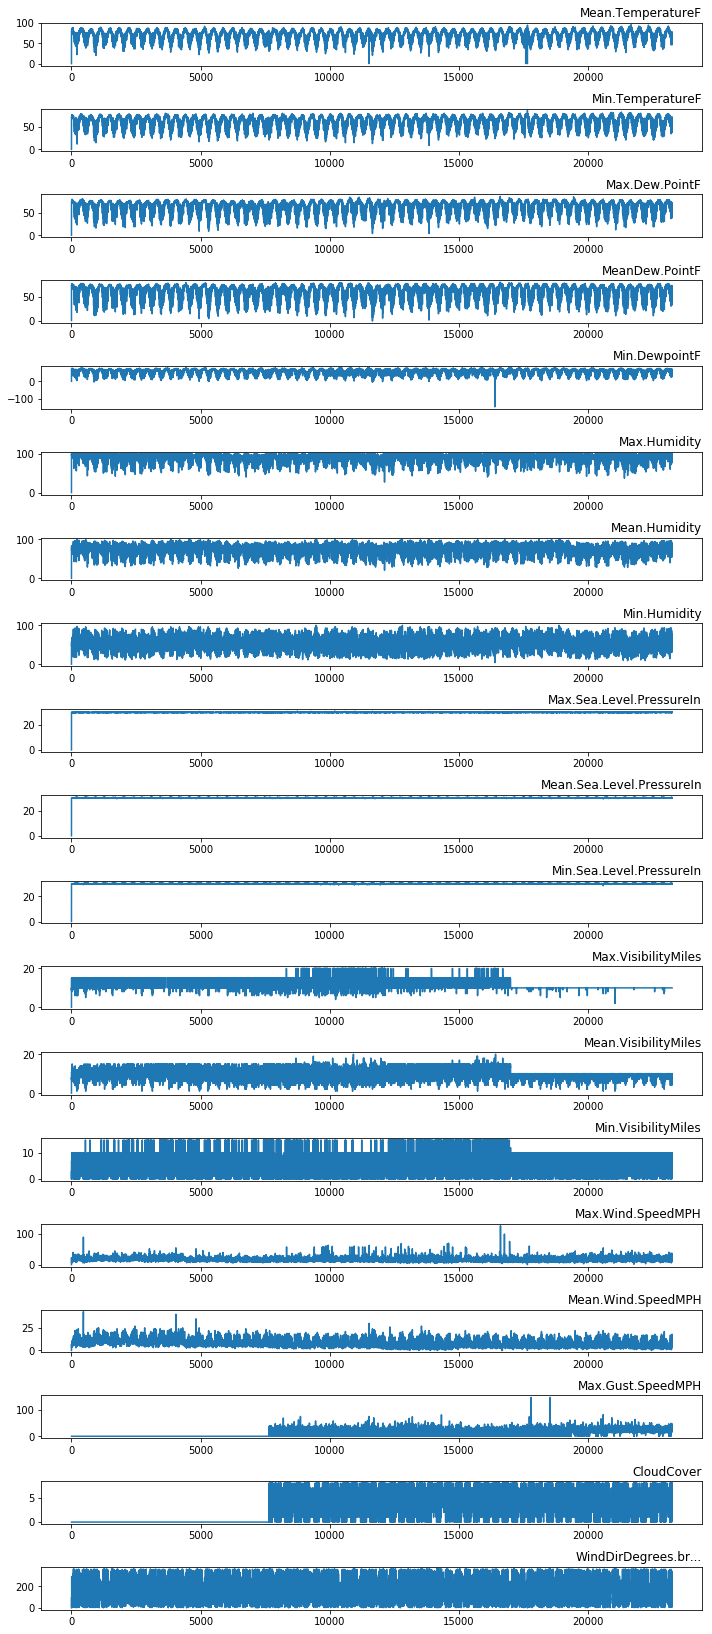

In [6]:
render_plots_numbers(houston_weather)